In [45]:
import pandas as pd
import numpy as np
import matplotlib.font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest

import os
os.chdir("/home/piai/바탕화면/01 실습파일/2. Big Data 분석")

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [46]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [47]:
df = pd.read_csv('Car.csv')

In [48]:
df = df.drop(labels='New_Price',axis=1)

In [49]:
df["Brand"] = df["Name"].apply(lambda x: x.split()[0])

df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [50]:
df['Mileage'] = pd.to_numeric(df['Mileage'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')

# df.head()

In [52]:
mapping = {
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth & Above": 4
}

df["Owner_Type"] = df["Owner_Type"].map(mapping)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,NaN,26.60,998.0,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,NaN,19.67,1582.0,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,NaN,18.20,1199.0,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,NaN,20.77,1248.0,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,NaN,15.20,1968.0,140.80,5.0,Audi


In [53]:
# 자동차 브랜드 리스트
brands = [
    "Maruti", "Hyundai", "Honda", "Audi", "Nissan", "Toyota",
    "Volkswagen", "Tata", "Land", "Mitsubishi", "Renault",
    "Mercedes-Benz", "BMW", "Mahindra", "Ford", "Porsche", "Datsun",
    "Jaguar", "Volvo", "Chevrolet", "Skoda", "Mini", "Fiat", "Jeep",
    "Smart", "Ambassador", "ISUZU", "Force", "Bentley", "Lamborghini",
    "Hindustan", "OpelCorsa"
]

# 인도 브랜드 리스트
indian_brands = {"Maruti", "Tata", "Mahindra", "Ambassador", "Hindustan", "Force"}

# 브랜드 국가 매핑
brand_countries = {
    "Maruti": "India", "Tata": "India", "Mahindra": "India", "Ambassador": "India", 
    "Hindustan": "India", "Force": "India",
    "Hyundai": "South Korea", "Honda": "Japan", "Audi": "Germany", "Nissan": "Japan", 
    "Toyota": "Japan", "Volkswagen": "Germany", "Land": "UK", "Mitsubishi": "Japan",
    "Renault": "France", "Mercedes-Benz": "Germany", "BMW": "Germany", "Ford": "USA", 
    "Porsche": "Germany", "Datsun": "Japan", "Jaguar": "UK", "Volvo": "Sweden", 
    "Chevrolet": "USA", "Skoda": "Czech Republic", "Mini": "UK", "Fiat": "Italy", 
    "Jeep": "USA", "Smart": "Germany", "ISUZU": "Japan", "Bentley": "UK", 
    "Lamborghini": "Italy", "OpelCorsa": "Germany"
}

# 인도 브랜드 여부 (인도=0, 비인도=1)
df["Indian_Brand"] = df["Brand"].apply(lambda x: 0 if x in indian_brands else 1)

# 브랜드 국가 정보 추가
df["Country"] = df["Brand"].map(brand_countries)

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Indian_Brand,Country
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,NaN,26.60,998.0,58.16,5.0,Maruti,0,India
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,NaN,19.67,1582.0,126.20,5.0,Hyundai,1,South Korea
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,NaN,18.20,1199.0,88.70,5.0,Honda,1,Japan
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,NaN,20.77,1248.0,88.76,7.0,Maruti,0,India
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,NaN,15.20,1968.0,140.80,5.0,Audi,1,Germany


In [54]:
# 'Engine', 'Power','Mileage' 는 모두 각 열별 평균으로 결측값 대체
# 'Seats' 는 최빈값 5로 처리
df[['Engine', 'Power']] = df[['Engine', 'Power']].apply(lambda col: col.fillna(col.mean()))
df[['Mileage']] = df[['Mileage']].apply(lambda col: col.fillna(col.mean()))
df["Seats"] = df["Seats"].fillna(5)
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type           7253
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Brand                   0
Indian_Brand            0
Country                 0
dtype: int64

In [55]:
df.describe(include='all')

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Indian_Brand,Country
count,7253,7253,6200.000000,7253.000000,7.253000e+03,7253,7253,0.0,7253.000000,7253.000000,7253.000000,7253.000000,7253,7253.000000,7253
unique,2041,11,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,32,NaN,10
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,NaN,Diesel,Manual,NaN,NaN,NaN,NaN,NaN,Maruti,NaN,India
freq,55,949,NaN,NaN,NaN,3852,5204,NaN,NaN,NaN,NaN,NaN,1444,NaN,2008
mean,NaN,NaN,14912.514750,2013.365366,5.869906e+04,NaN,NaN,NaN,18.141580,1616.573470,112.765214,5.277678,NaN,0.723149,NaN
std,NaN,NaN,17674.318464,3.254421,8.442772e+04,NaN,NaN,NaN,4.561567,593.394164,52.844178,0.809039,NaN,0.447473,NaN
min,NaN,NaN,7.080000,1996.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,5365.360000,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,77.000000,5.000000,NaN,0.000000,NaN
50%,NaN,NaN,8814.520000,2014.000000,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,98.600000,5.000000,NaN,1.000000,NaN
75%,NaN,NaN,15869.972500,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.030000,5.000000,NaN,1.000000,NaN


In [56]:
df.to_csv("car_1.csv", index=False)

In [57]:
print(df.columns)

Index(['Name', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand', 'Indian_Brand', 'Country'],
      dtype='object')


In [58]:
df = df[['Brand', 'Indian_Brand', 'Country', 'Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Name']]  # 원하는 순서로 변경

df.to_csv("car_1.csv", index=False)

In [59]:
df_cleaned = df.dropna(subset=["Price"])
df_cleaned.isnull().sum()

Brand                   0
Indian_Brand            0
Country                 0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type           6200
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Name                    0
dtype: int64

In [60]:
df_cleaned.describe()

,Indian_Brand,Price,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats
count,6200.000000,6200.000000,6200.000000,6.200000e+03,0.0,6200.000000,6200.000000,6200.000000,6200.000000
mean,0.720161,14912.514750,2013.434194,5.815738e+04,NaN,18.183434,1619.983814,113.300417,5.276613
std,0.448956,17674.318464,3.271969,9.010627e+04,NaN,4.576864,599.744181,53.540989,0.805951
min,0.000000,7.080000,1998.000000,1.710000e+02,NaN,0.000000,72.000000,34.200000,0.000000
25%,0.000000,5365.360000,2012.000000,3.300000e+04,NaN,15.260000,1198.000000,77.750000,5.000000
50%,1.000000,8814.520000,2014.000000,5.251450e+04,NaN,18.200000,1493.000000,98.600000,5.000000
75%,1.000000,15869.972500,2016.000000,7.227750e+04,NaN,21.100000,1968.000000,138.030000,5.000000
max,1.000000,245273.600000,2019.000000,6.500000e+06,NaN,33.540000,5998.000000,616.000000,10.000000


/tmp/ipykernel_27614/2955304742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_cleaned.corr()


<Axes: >

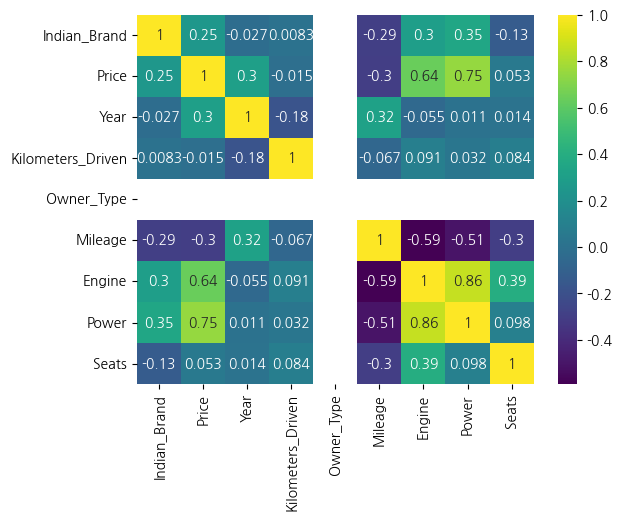

In [61]:
# 상관분석
df_corr = df_cleaned.corr()
sns.heatmap(df_corr, annot = True, cmap="viridis")

In [62]:
# 각 Fuel_Type의 개수 계산
list=['Brand', 'Indian_Brand', 'Location', 'Year',
        'Fuel_Type', 'Transmission', 'Owner_Type',
     'Seats']
for i in list:
    print(i)
    print(f"{df[i].value_counts()}")
    print("--------------------------------------------------")


Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64
--------------------------------------------------
Indian_Brand
1    5245
0    2008
Name: Indian_Brand, dtype: int64
--------------------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          7

In [63]:
df.columns

Index(['Brand', 'Indian_Brand', 'Country', 'Location', 'Price', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Name'],
      dtype='object')

In [64]:
#좌석 0개는 삭제
df = df[df["Seats"] != 0]

In [65]:
# 주행거리(Kilometers_Driven)이 50만 이상인 데이터는 결측치라고 여겨 삭제했다.
df = df[df["Kilometers_Driven"] <= 500000]

In [66]:
df.sort_values(by="Kilometers_Driven", ascending=False).head(10)

,Brand,Indian_Brand,Country,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Name
3092,Honda,1,Japan,Kolkata,7664.80,2015,480000,Petrol,Manual,NaN,17.40,1497.0,117.30,5.0,Honda City i VTEC SV
2823,Volkswagen,1,Germany,Chennai,19928.48,2015,480000,Diesel,Automatic,NaN,16.96,1968.0,138.03,5.0,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT
4491,Hyundai,1,South Korea,Bangalore,6821.67,2013,445000,Petrol,Manual,NaN,18.50,1197.0,82.90,5.0,Hyundai i20 Magna Optional 1.2
6921,Maruti,0,India,Jaipur,NaN,2012,350000,Diesel,Manual,NaN,23.40,1248.0,74.00,5.0,Maruti Swift Dzire Tour LDI
3649,Tata,0,India,Jaipur,1532.96,2008,300000,Diesel,Manual,NaN,17.00,1405.0,70.00,5.0,Tata Indigo LS
1528,Toyota,1,Japan,Hyderabad,6131.84,2005,299322,Diesel,Manual,NaN,12.80,2494.0,102.00,8.0,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV
6919,ISUZU,1,Japan,Jaipur,NaN,2017,290000,Diesel,Manual,NaN,12.40,2499.0,134.00,5.0,ISUZU D-MAX V-Cross 4X4
1975,Skoda,1,Czech Republic,Pune,5058.77,2012,282000,Petrol,Manual,NaN,13.14,1798.0,160.00,5.0,Skoda Superb 1.8 TSI MT
29,Toyota,1,Japan,Mumbai,6131.84,2007,262000,Diesel,Manual,NaN,12.80,2494.0,102.00,7.0,Toyota Innova 2.5 V Diesel 7-seater
1846,Toyota,1,Japan,Pune,9964.24,2013,255000,Diesel,Manual,NaN,12.99,2494.0,100.60,7.0,Toyota Innova 2.5 GX (Diesel) 7 Seater


<Axes: >

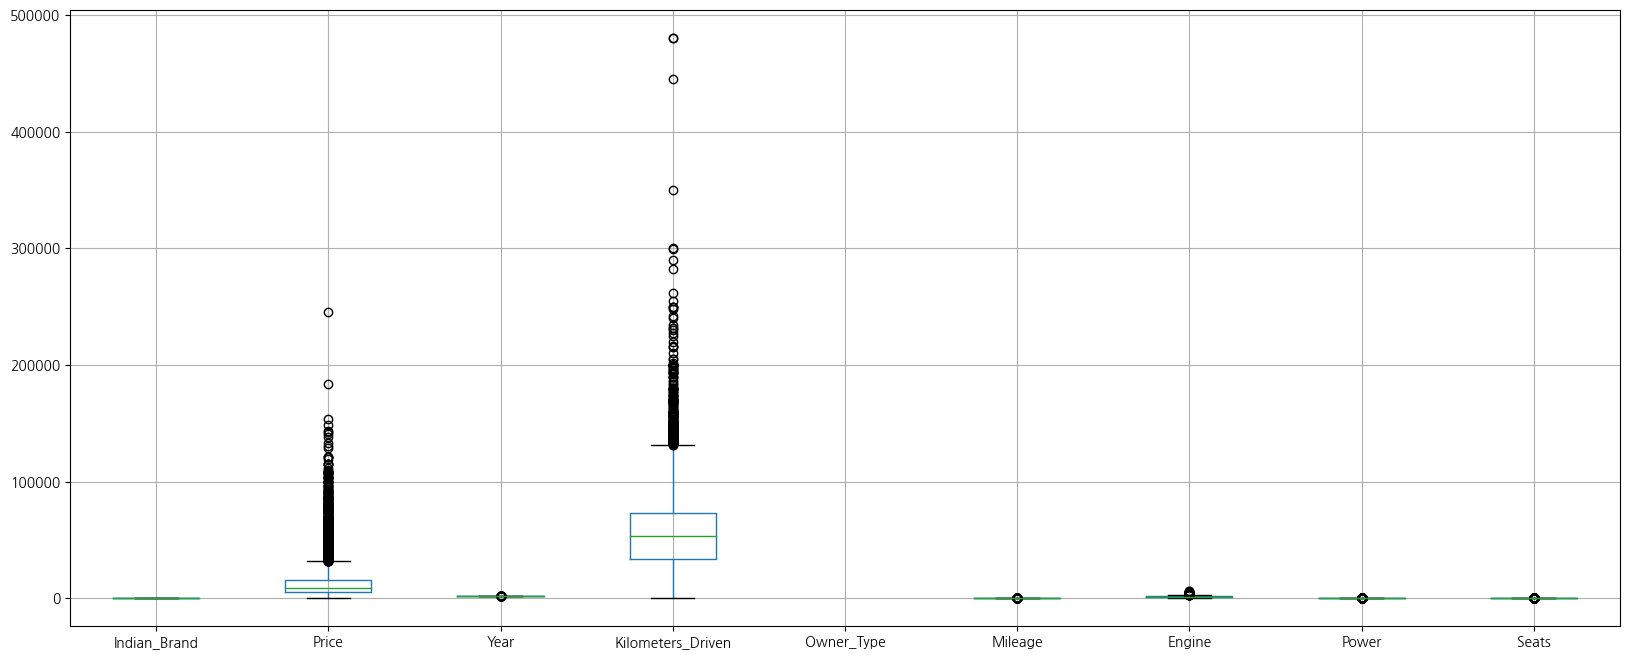

In [67]:
df.boxplot(figsize=(20,8))

In [68]:
df.to_csv("car_2.csv", index=False)

In [69]:
df.isnull().sum()

Brand                   0
Indian_Brand            0
Country                 0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type           7248
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Name                    0
dtype: int64

In [70]:
#1차 보정: Name + Year 그룹별 중앙값으로 채우기
#2차 보정: Brand + Year 그룹별 중앙값으로 채우기
#3차 보정: 전체 중앙값으로 남은 결측치 채우기

df['Price'] = df.groupby(['Name', 'Year'])['Price'].transform(lambda x: x.fillna(x.median()))
df['Price'] = df.groupby(['Brand', 'Year'])['Price'].transform(lambda x: x.fillna(x.median()))

overall_median_price = df['Price'].median()
df['Price'].fillna(overall_median_price, inplace=True)
df['Price'].isnull().sum()

0

<Axes: >

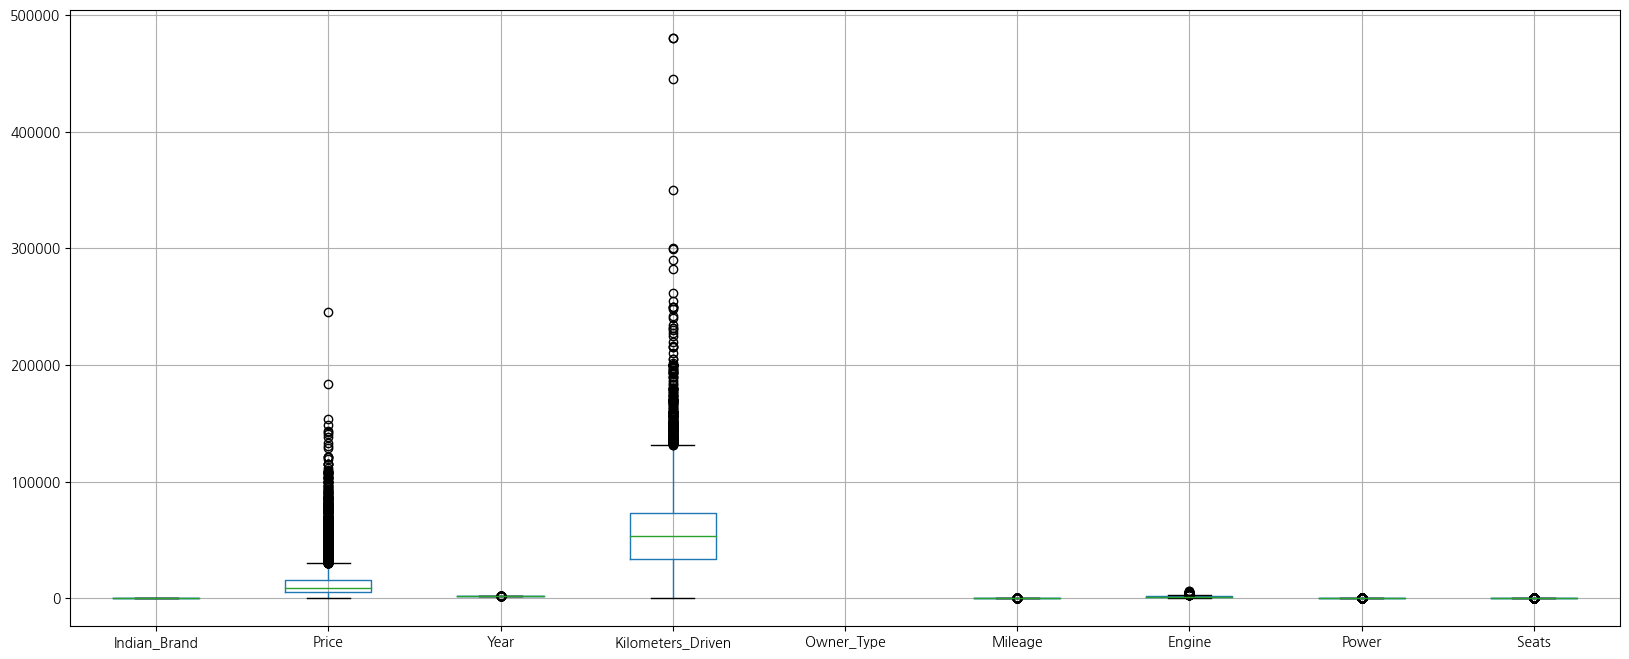

In [71]:
df.boxplot(figsize=(20,8))

/tmp/ipykernel_27614/2477013666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

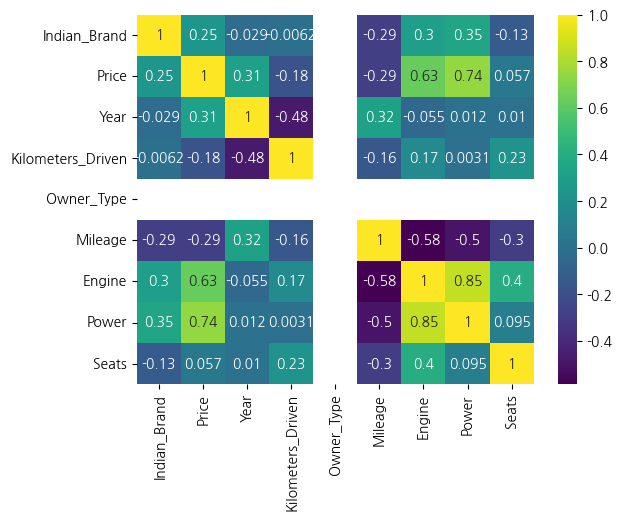

In [72]:
# 상관분석
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap="viridis")

# Gradient Boosting

In [73]:
#범주형 데이터 처리

# 2020년 자료라고 가정 / 연식 -> 나이로 변경(더 직관적)
# 최근 차량일수록 연식이 낮아지고, 오래된 차량일수록 값이 커짐.
df['Age'] = 2020 - df['Year']
df = df.drop(labels='Year',axis=1)

In [74]:
# 각 브랜드의 평균 Price 값을 해당 브랜드의 대표값으로 변환.
# 하지만 데이터의 분포를 과적합(overfitting)할 가능성이 있으므로 주의가 필요.
brand_price_mean = df.groupby('Brand')['Price'].mean()
df['Brand_encoded'] = df['Brand'].map(brand_price_mean)

In [75]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)

In [76]:
location_mapping = {
    "Mumbai": 10,
    "Bangalore": 9,
    "Delhi": 8,
    "Hyderabad": 7,
    "Pune": 6,
    "Chennai": 5,
    "Ahmedabad": 4,
    "Kochi": 3,
    "Kolkata": 2,
    "Coimbatore": 1,
    "Jaipur": 0
}

df["Location"] = df["Location"].map(location_mapping)

In [81]:
# # 매핑 딕셔너리
# map_transmission = {
#     "Manual": 0,
#     "Automatic": 1
# }

# # 매핑 적용
# df["Transmission"] = df["Transmission"].map(map_transmission)

In [82]:
df1 = df.drop(labels='Brand',axis=1)
df2 = df1.drop(labels='Country',axis=1)
df3 = df2.drop(labels='Name',axis=1)
df3.head()

,Indian_Brand,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Brand_encoded,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,10,2682.68,72000,NaN,26.60,998.0,58.16,5.0,10,6995.616094,0,0,0,0,1
1,1,6,19162.00,41000,NaN,19.67,1582.0,126.20,5.0,5,8264.125030,1,0,0,0,1
2,1,5,6898.32,46000,NaN,18.20,1199.0,88.70,5.0,9,8358.025727,0,0,0,1,1
3,0,5,9197.76,87000,NaN,20.77,1248.0,88.76,7.0,8,6995.616094,1,0,0,0,1
4,1,1,27194.71,40670,NaN,15.20,1968.0,140.80,5.0,7,39077.498451,1,0,0,0,0


In [83]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df3["Price"]
df_raw_x = df3.drop("Price", axis = 1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.2, random_state = 1234)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

para_lr = [0.01, 0.05, 0.1, 0.2]      # 학습률 후보 값
para_depth = [3, 5, 7, 9]             # 트리 깊이 후보 값
para_leaf = [1, 3, 5, 7]              # 리프 노드의 최소 샘플 수 후보 값

estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"], 
              "learning_rate": para_lr, "max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

ValueError: 
All the 2880 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
829 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingRegressor must be a str among {'friedman_mse', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
131 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 429, in fit
    X, y = self._validate_data(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

--------------------------------------------------------------------------------
860 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingRegressor must be a str among {'friedman_mse', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'friedman_mse'}. Got 'mae' instead.


In [ ]:
df.head()

In [ ]:
df3.to_csv("/home/piai/다운로드/car_split_1.csv", index=False)